Integrantes
Ferney Alonso Montoya Gallo CC: 1007291652
Juan camilo avendaño rodriguez: 1193585383

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE, SMOTENC
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import joblib
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, make_scorer
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [24]:
from sklearn.datasets import make_blobs
X, y = make_blobs(
        n_samples    = 500,
        n_features   = 2,
        centers      = 3,
        cluster_std  = 1.2,
        shuffle      = True,
        random_state = 0
       )


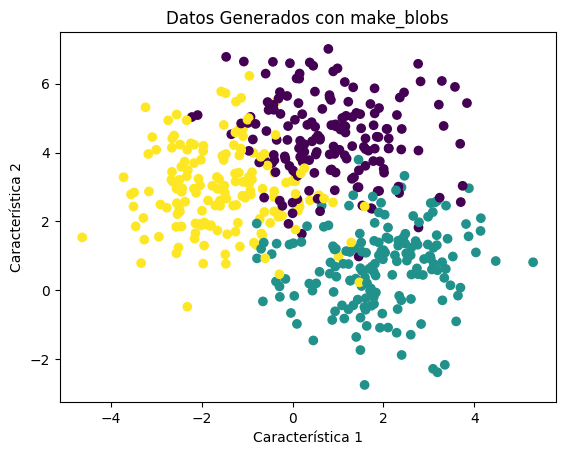

In [25]:
# Graficar los puntos de datos en un gráfico de dispersión
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Datos Generados con make_blobs")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()


In [26]:
#creamos dataframe en pandas con los datos
df = pd.DataFrame({'Feature1': X[:, 0], 'Feature2': X[:, 1], 'Label': y})

# Mostrar las primeras filas del DataFrame
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  500 non-null    float64
 1   Feature2  500 non-null    float64
 2   Label     500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


,Feature1,Feature2,Label
0,1.128565,4.786175,0
1,-2.014034,3.787124,2
2,-2.135925,1.655626,2
3,1.744428,2.363440,0
4,-1.347266,4.530322,0


In [49]:
#creamos los splits de kfolds
kf = KFold(n_splits=5)
kf.get_n_splits(df)


5

In [50]:
X = df.drop('Label', axis=1)
Y = df['Label']

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [51]:
#configuramos el randomizedSearch
model = MLPClassifier()

param_dist = {
    'hidden_layer_sizes': [(n_neurons,) * n_layers for n_neurons in [5, 10, 15, 20] for n_layers in [1, 2, 3]],
}
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=kf)

In [52]:


# Ajustamos el modelo a los datos de entrenamiento para buscar los mejores hiperparámetros.
random_search.fit(X_train, Y_train)

# Imprimimos los mejores hiperparámetros encontrados.
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

# Evaluamos el rendimiento del modelo con los mejores hiperparámetros en los datos de prueba.
accuracy = random_search.score(X_test, Y_test)
print(f"Puntuación de precisión en el conjunto de prueba: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_p

Mejores hiperparámetros encontrados:
{'hidden_layer_sizes': (20, 20, 20)}
Puntuación de precisión en el conjunto de prueba: 0.8666666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


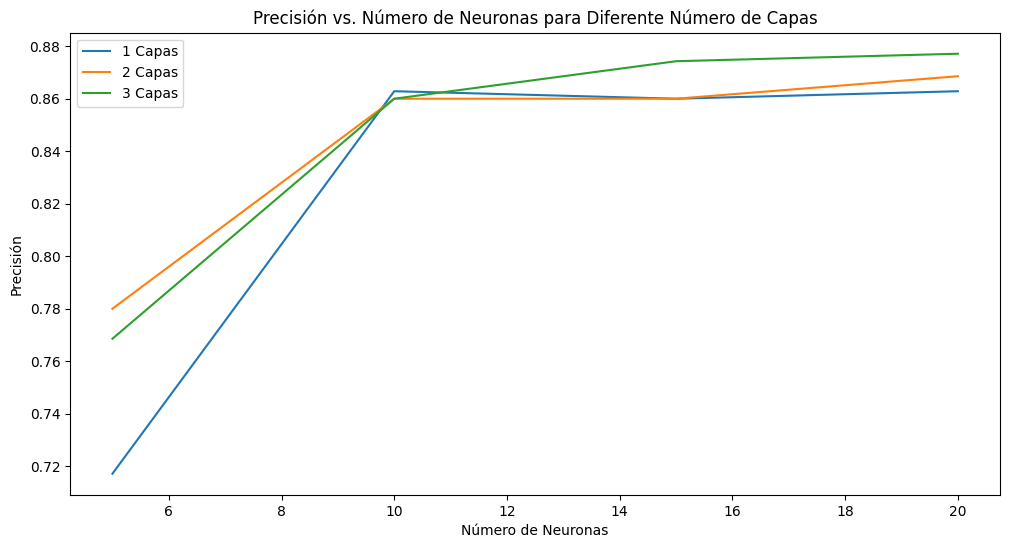

In [54]:
# Obtén los resultados de la búsqueda aleatoria
results = pd.DataFrame(random_search.cv_results_)

# Filtra las columnas relevantes para el gráfico
results = results[['param_hidden_layer_sizes', 'mean_test_score']]

# Separa los parámetros de capas en neuronas y número de capas
results['neurons'] = results['param_hidden_layer_sizes'].apply(lambda x: x[0])
results['layers'] = results['param_hidden_layer_sizes'].apply(lambda x: len(x))

# Ordena el DataFrame por el número de capas
results = results.sort_values('layers')

# Crea una figura para el gráfico
plt.figure(figsize=(12, 6))

# Itera a través de los valores únicos de capas para crear una tabla por número de capas
for num_layers in results['layers'].unique():
    subset = results[results['layers'] == num_layers]
    plt.plot(subset['neurons'], subset['mean_test_score'], label=f'{num_layers} Capas')

# Configura los ejes y el título del gráfico
plt.xlabel('Número de Neuronas')
plt.ylabel('Precisión')
plt.title('Precisión vs. Número de Neuronas para Diferente Número de Capas')

# Agrega una leyenda para las líneas correspondientes al número de capas
plt.legend()

# Muestra el gráfico
plt.show()



In [55]:
#construimos el mejor modelo obtenido de los hiperparametros el modelo mas simple sin tanto esfuerzo
best_model = MLPClassifier(hidden_layer_sizes=(10,)*1, activation="relu")

In [56]:
#entrenamos con toda la data
best_model.fit(X_train,Y_train)
accuracy = best_model.score(X_test, Y_test)
print(f"Puntuación de precisión en el conjunto de prueba: {accuracy}")

Puntuación de precisión en el conjunto de prueba: 0.8533333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [57]:
#predecimos los datos con el mejor modelo
best_model.predict(X)

array([0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0, 0, 1,
       1, 2, 0, 2, 1, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 1, 1, 2, 2, 0, 0, 1,
       1, 0, 1, 0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2,
       1, 1, 0, 0, 2, 0, 0, 2, 1, 2, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1, 2, 2,
       2, 2, 0, 0, 1, 2, 0, 1, 2, 0, 0, 0, 1, 2, 2, 0, 0, 2, 0, 1, 0, 1,
       0, 0, 1, 0, 2, 1, 2, 1, 1, 2, 2, 1, 0, 2, 2, 0, 2, 0, 0, 0, 1, 0,
       2, 1, 0, 1, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 2, 0, 1, 0, 2, 2, 2, 1, 0, 1, 0, 1, 2, 2, 1, 0, 0, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 0, 2, 2, 0, 1, 1, 0, 2, 1, 0,
       2, 1, 2, 1, 0, 0, 2, 2, 1, 2, 2, 2, 0, 1, 1, 2, 2, 0, 2, 0, 2, 2,
       1, 2, 0, 1, 0, 0, 0, 1, 2, 0, 0, 2, 0, 1, 2, 2, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 2, 1, 1, 2, 1, 0, 2, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0,
       2, 2, 2, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 0,

In [ ]:
#Conclusion vale la pena usar solo 10 neuronas y una capa que 20 neuronas y 3 capas, ya que da buenos resultados siendo un modelo muy simple